In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from matplotlib.colors import hsv_to_rgb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import glob

In [2]:
def display(img, cmap = None):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = cmap)

In [3]:
patch = cv2.imread('NaCl_patches/IMG_0290.JPG')
#patch_RGB = cv2.cvtColor(patch, cv2.COLOR_BGR2RGB)

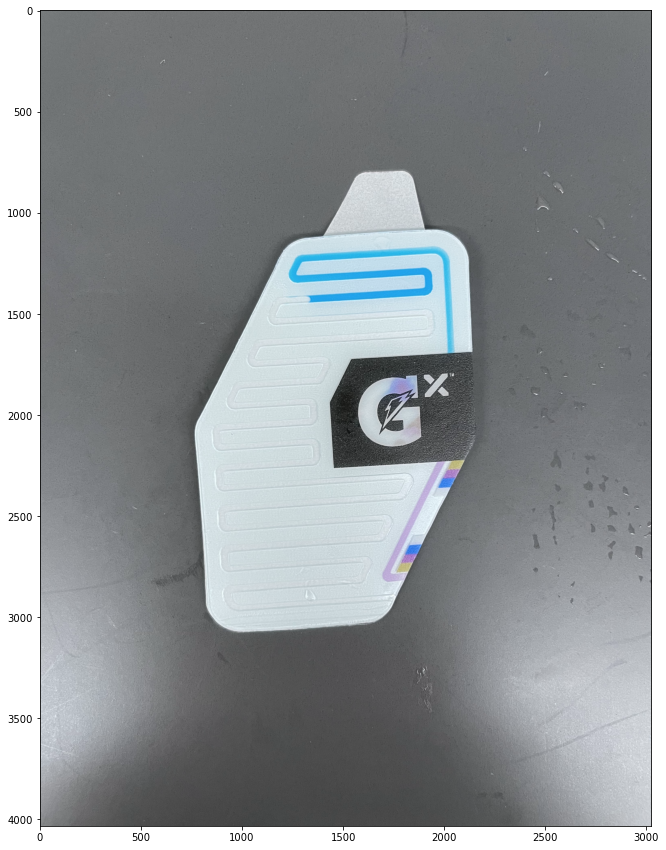

In [4]:
display(patch)

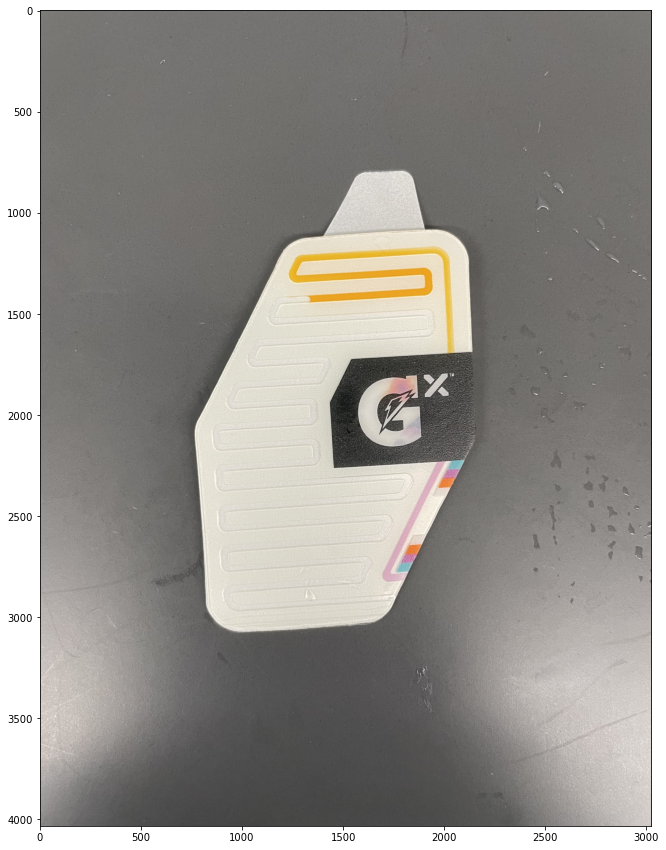

In [5]:
patch_RGB = cv2.cvtColor(patch,cv2.COLOR_BGR2RGB)
display(patch_RGB)

Extracting the purple channel and reference swatches

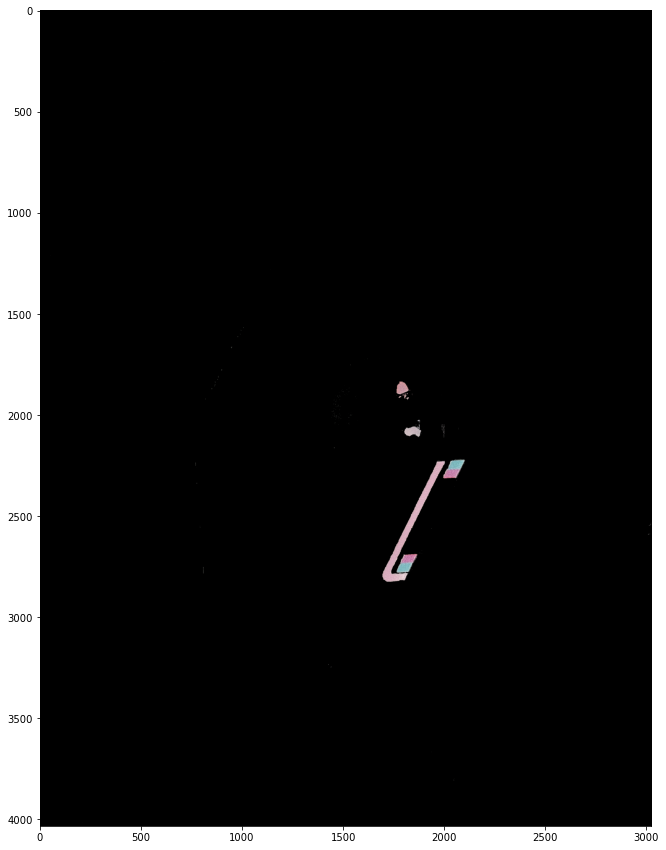

In [6]:
light_purple = (40, 10, 70)
# dark_orange = (0, 89, 253)
dark_purple = (180, 255, 255)
patch_HSV = cv2.cvtColor(patch_RGB, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(patch_HSV,light_purple,dark_purple)
result1 = cv2.bitwise_and(patch_RGB,patch_RGB, mask=mask)
display(result1)

Extracting only the ref. swatches

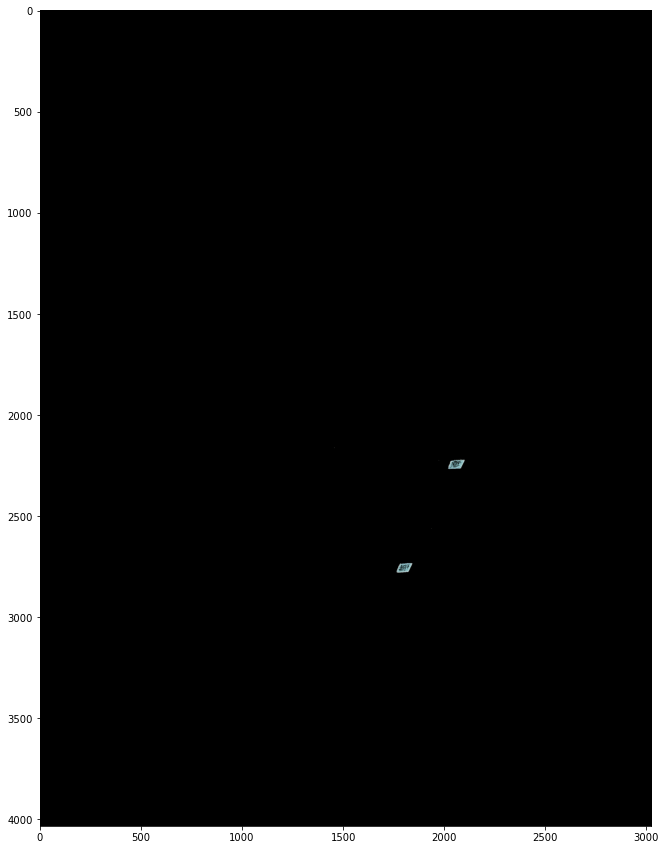

In [7]:
light_purple = (40, 10, 100)
# dark_orange = (0, 89, 253)
dark_purple = (100, 85, 255)
patch_HSV = cv2.cvtColor(patch_RGB, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(patch_HSV,light_purple,dark_purple)
result2 = cv2.bitwise_and(patch_RGB,patch_RGB, mask=mask)
display(result2)

Extracting only the purple channel

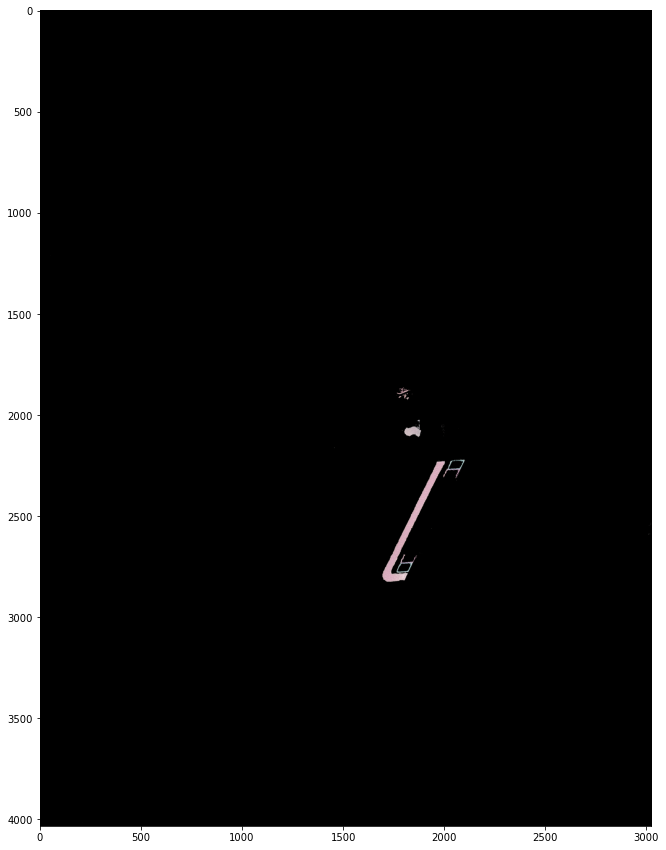

In [8]:
light_purple = (40, 10, 100)
# dark_orange = (0, 89, 253)
dark_purple = (180, 60, 255)
patch_HSV = cv2.cvtColor(patch_RGB, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(patch_HSV,light_purple,dark_purple)
result = cv2.bitwise_and(patch_RGB,patch_RGB, mask=mask)
display(result)

Performing edge detection using Canny Edge Detection

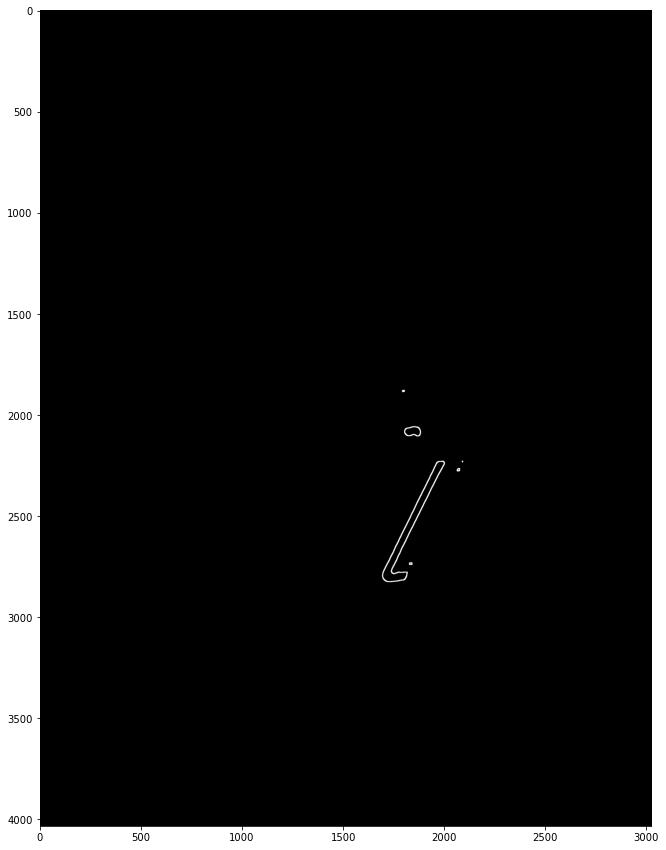

In [9]:
image = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
template = cv2.medianBlur(image, 21)
template = cv2.Canny(template, 200, 250)
kernel = np.ones((3, 3), np.uint8)
template = cv2.dilate(template, kernel, iterations =2)
display(template, cmap='gray')

Finding all the contours and displaying the one belonging to the purple channel

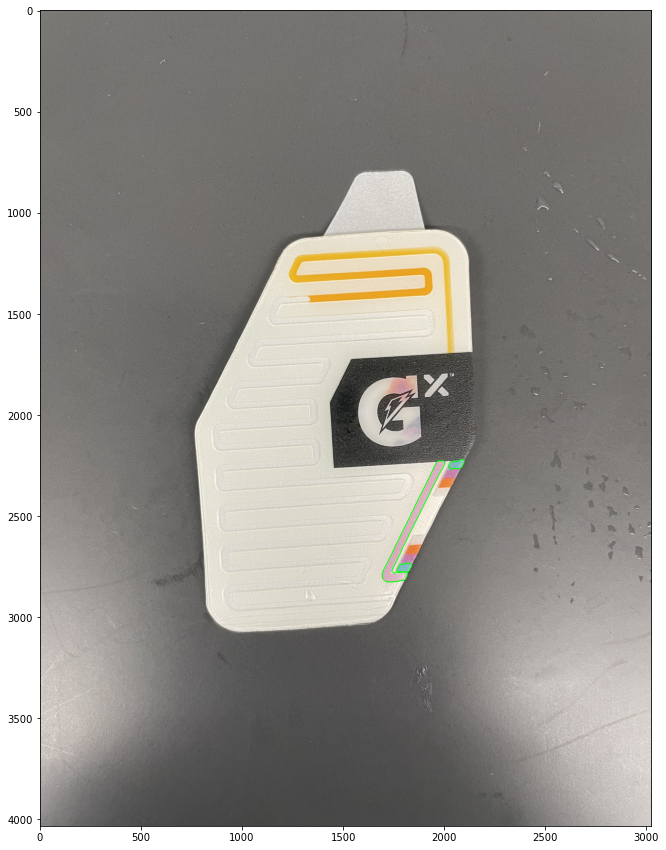

In [16]:
contours, hierarchy = cv2.findContours(template,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]
cv2.drawContours(patch_RGB, contours,3, (0, 255, 0), 3) 
display(patch_RGB)

In [160]:
len(contours)

8

Performing the same steps for finding the contour of the ref. swatch

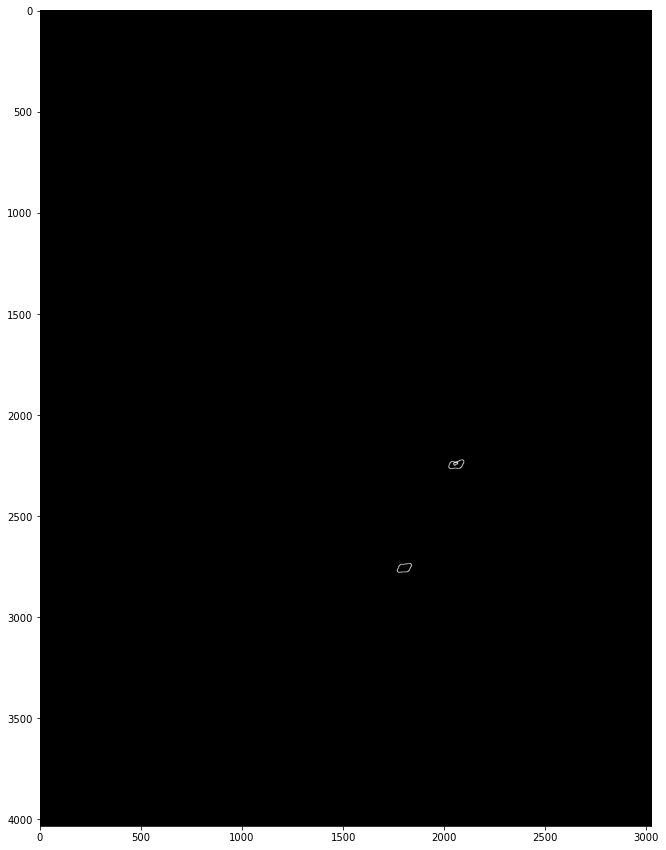

In [11]:
image = cv2.cvtColor(result2, cv2.COLOR_RGB2GRAY)
template2 = cv2.medianBlur(image, 21)
template2 = cv2.Canny(template2, 200, 250)
kernel = np.ones((3, 3), np.uint8)
template2 = cv2.dilate(template2, kernel, iterations =1)
display(template2, cmap='gray')

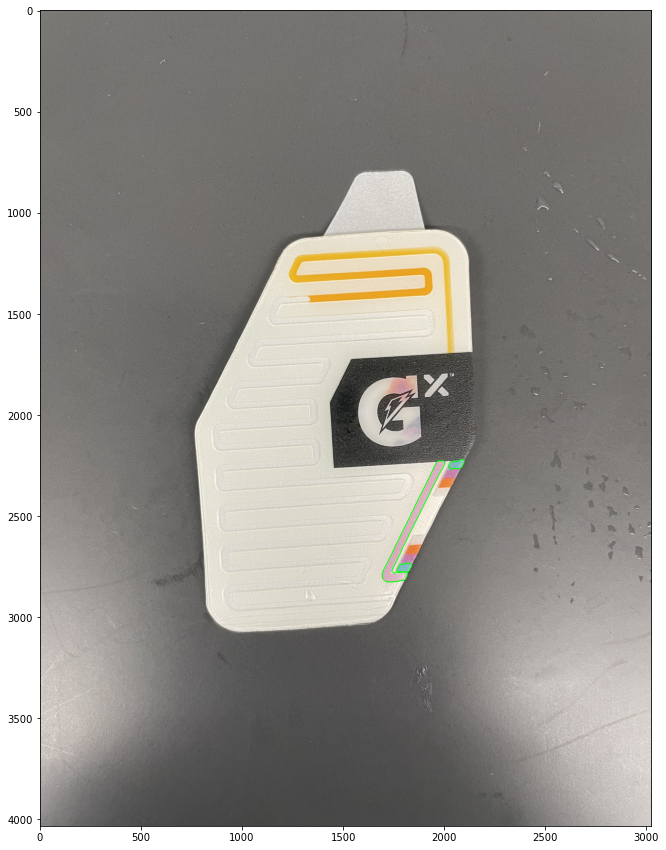

In [12]:
contours, hierarchy = cv2.findContours(template2,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]
cv2.drawContours(patch_RGB, contours,-1, (0, 255, 0), 3) 
display(patch_RGB)

Calculating the mean RGB value for the swatch

In [14]:
mask2 = np.zeros(template2.shape, np.uint8)
cv2.drawContours(mask2, contours, 0, 255, -1)
mean = cv2.mean(patch_RGB, mask=mask2)
mean

(102.62892843619841, 205.1268458917077, 146.39530480878454, 0.0)

Calculating the mean RGB value of the purple channel

In [18]:
mask = np.zeros(template.shape, np.uint8)
cv2.drawContours(mask, contours, 3, 255, -1)
mean = cv2.mean(patch_RGB, mask=mask)
mean

(186.20122499826977, 190.66053014049416, 163.91854107550697, 0.0)

Plotting the calibration curve of the mean RGB (R+G+B)/3 intensity against the NaCl concentrations

y = -37.07720 * x + 6.67000 * x^2 + 213.18993


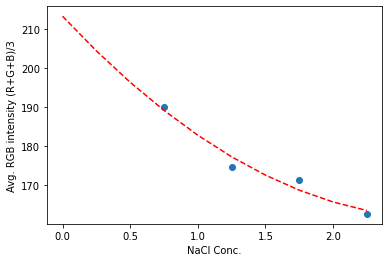

In [20]:
# fit a second degree polynomial to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

# define the true objective function
def objective(x, a, b, c):
    return a * x + b * x**2 + c


x, y = np.array([0.75, 1.25, 1.75, 2.25]),np.array([ 190, 174.667, 171.33, 162.667 ])
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(0, 2.5, 0.25)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.xlabel('NaCl Conc.')
pyplot.ylabel('Avg. RGB intensity (R+G+B)/3')
pyplot.show()